In [ ]:
# %%time 
# Wall time: 1min 26s
# ! unzip "/content/drive/MyDrive/AIML_Project_Team_10/Data/bdd100k_images_100k.zip" -d "/content"

In [ ]:
# ! unzip "/content/drive/MyDrive/AIML_Project_Team_10/Data/BDD100k_val_labels.zip" -d "/content/Labels"
# ! unzip "/content/drive/MyDrive/AIML_Project_Team_10/Data/BDD100k_train_labels.zip" -d "/content/Labels"

In [ ]:
# !nvidia-smi -L

GPU 0: Tesla V100-SXM2-16GB (UUID: GPU-d0b7d81f-fdea-f287-54a0-3f4133f88f14)


In [ ]:
# To delte folder
# %rm -rf /content/Delete_Images

In [ ]:
# Create folder to store files required for run
import os 
dir = 'run_files'
if not os.path.exists(dir):
    os.makedirs(dir)

In [1]:
!git clone https://github.com/Socret360/object-detection-in-keras.git

Cloning into 'object-detection-in-keras'...
remote: Enumerating objects: 1976, done.
remote: Counting objects: 100% (315/315), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 1976 (delta 295), reused 285 (delta 283), pack-reused 1661
Receiving objects: 100% (1976/1976), 52.80 MiB | 17.59 MiB/s, done.
Resolving deltas: 100% (1379/1379), done.


In [ ]:
%pwd

'/content'

In [ ]:
repo_url = "/content/object-detection-in-keras"
%cd $repo_url

/content/object-detection-in-keras


Next Steps:
1. Update the BBD bounding boxes to be rounded without decimal
2. Fix training and validation split 
3. Test the results for 1 or some images
4. Use of GPU

In [ ]:
label_maps=['pedestrian','rider','car','truck','bus','train','motorcycle','bicycle','traffic light','traffic sign','other vehicle']

type(label_maps)

# open file in write mode
with open(r'/content/run_files/label_maps.txt', 'w') as fp:
    for item in label_maps:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [ ]:
# IMPORTANT: Change the three file links and run this code twice, to create train and val text files//// 
import os 
a = os.listdir('/content/Labels/BDD100k_val_labels/')
b = os.listdir('/content/bdd100k/images/100k/val/')
a.sort()
b.sort()
len(a)
samples = [m+" " +str(n) for m,n in zip(b,a)]
# samples[0]

# open file in write mode
with open(r'/content/run_files/val.txt', 'w') as fp:
    for i, item in enumerate(samples):
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [ ]:
#@title
# import os 
# a = os.listdir('/content/Labels/BDD100k_train_labels/')
# b = os.listdir('/content/bdd100k/images/100k/train/')
# a.sort()
# b.sort()
# len(a)
# samples = [m+" " +str(n) for m,n in zip(b,a)]

# # open file in write mode
# with open(r'/content/run_files/train.txt', 'w') as fp1, open(r'/content/run_files/val.txt', 'w') as fp2, open(r'/content/run_files/test.txt', 'w') as fp3:
#     for i, item in enumerate(samples):
#         # write each item on a new line
#         if i<8000:
#             fp1.write("%s\n" % item)
#         if ((i>=8000) and (i<9000)):
#             fp2.write("%s\n" % item)
#         if i>=9000:
#             fp3.write("%s\n" % item)
#     print('Done')

Done


In [ ]:
#IMP: run twice to create combined images folder and combined labels folded 
# In last line use 'move' or 'copy' to do either

import shutil
import os
  
  
# Function to create new folder if not exists
def make_new_folder(folder_name, parent_folder):
      
    # Path
    path = os.path.join(parent_folder, folder_name)
      
    # Create the folder
    # 'new_folder' in
    # parent_folder
    try: 
        # mode of the folder
        mode = 0o777
  
        # Create folder
        os.mkdir(path, mode) 
    except OSError as error: 
        print(error)
  
# current folder path
current_folder = '/content' 
  
# list of folders to be merged
# list_dir = ['/content/Labels/BDD100k_train_labels', '/content/Labels/BDD100k_val_labels']
list_dir = ['/content/bdd100k/images/100k/train', '/content/bdd100k/images/100k/val']
  
# enumerate on list_dir to get the 
# content of all the folders ans store 
# it in a dictionary
content_list = {}
for index, val in enumerate(list_dir):
    path = os.path.join(current_folder, val)
    content_list[ list_dir[index] ] = os.listdir(path)
  
# folder in which all the content will
# be merged
# merge_folder = "Combined_Labels"
merge_folder = "Combined_Images"
  
# merge_folder path - current_folder 
# + merge_folder
merge_folder_path = os.path.join(current_folder, merge_folder) 
  
# create merge_folder if not exists
make_new_folder(merge_folder, current_folder)
  
# loop through the list of folders
for sub_dir in content_list:
  
    # loop through the contents of the 
    # list of folders
    for contents in content_list[sub_dir]:
  
        # make the path of the content to move 
        path_to_content = sub_dir + "/" + contents  
  
        # make the path with the current folder
        dir_to_move = os.path.join(current_folder, path_to_content )
  
        # move the file
        shutil.move(dir_to_move, merge_folder_path)

In [ ]:
! python train.py \
/content/object-detection-in-keras/configs/ssd300_vgg16_pascal-voc-07-12.json \
/content/Combined_Images \
/content/Combined_Labels \
--training_split=/content/run_files/train.txt \
--validation_split=/content/run_files/val.txt \
--label_maps=/content/run_files/label_maps.txt \
--learning_rate=0.001 \
--epochs=10 \
--batch_size=16 \
--shuffle=True \
--augment=True \
--output_dir=/content/drive/MyDrive/AIML_Project_Team_10/SSD/SSD_Model_Weights/BDD/Run3

-- validation split specified
2022-08-26 06:55:23.944841: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
58892288/58889256 [==============================] - 0s 0us/step

Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/10
4365/4365 [==============================] - 12580s 3s/step - loss: 5.8433 - val_loss: 4.7352 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/10
4365/4365 [==============================] - 12290s 3s/step - loss: 4.7363 - val_loss: 4.2778 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/10
4365/4365 [==============================] - 12145s 3s/step - loss: 4.6487 - val_loss: 4.3547 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/10
4365/4365 [==============================] - 12222s 3s/step - loss

In [ ]:
current_folder = os.getcwd() 
current_folder

'/content/object-detection-in-keras'

In [ ]:
# !cp /content/object-detection-in-keras/output/ssd300_vgg16_pascal-voc-2007/model.h5 /content/drive/MyDrive/AIML_Project_Team_10/SSD/SSD_Model_Weights/BDD

In [ ]:
! python inference.py 
# "/content/bdd100k/images/100k/test/cabc30fc-e7726578.jpg" \
# /content/object-detection-in-keras/configs/ssd300_vgg16_pascal-voc-07-12.json \
# /content/drive/MyDrive/AIML_Project_Team_10/SSD/SSD_Model_Weights/BDD/Run2/model.h5 \
# --label_maps=/content/run_files/label_maps.txt \
# --confidence_threshold=0.8 \
# --num_predictions=1

2022-08-15 16:23:22.279322: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
-- CAR: 98.86%




In [ ]:
import os
import cv2
import numpy as np
from networks import SSD_VGG16
from tensorflow.keras.applications import vgg16
from utils import ssd_utils


def ssd_vgg16(config):
    with open("/content/run_files/label_maps.txt", "r") as file:
        label_maps = [line.strip("\n") for line in file.readlines()]

    model = SSD_VGG16(
        config,
        label_maps,
        is_training=False,
        num_predictions=3
    )
    process_input_fn = vgg16.preprocess_input

    return model, process_input_fn, label_maps

In [ ]:
import json

def load_config(config_file_path):
  with open(config_file_path, "r") as config_file:
    config = json.load(config_file)
    return config

config = load_config('/content/object-detection-in-keras/configs/ssd300_vgg16_pascal-voc-07-12.json')

In [ ]:
model, process_input_fn, label_maps = ssd_vgg16(config)

-- CAR: 92.78%




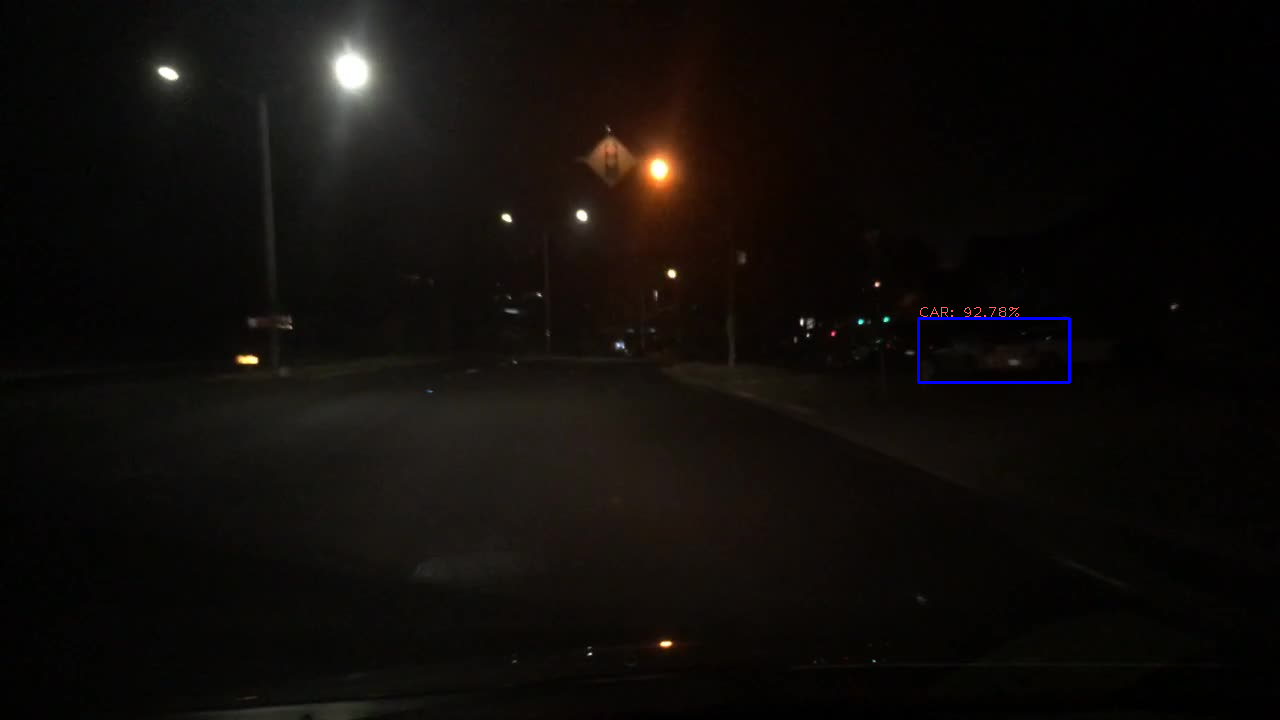

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import os
import json
import argparse
import numpy as np
from glob import glob
from utils import inference_utils

input_size = 300
confidence_threshold = 0.7

model.load_weights("/content/drive/MyDrive/AIML_Project_Team_10/SSD/SSD_Model_Weights/BDD/Run2/model.h5")


# for idx, input_image in enumerate(list(glob(args.images))):

image = cv2.imread("/content/bdd100k/images/100k/test/cadb239d-499b1478.jpg")  # read image in bgr format
# image = cv2.resize(image, (0, 0), fx=0.3, fy=0.3)
image = np.array(image, dtype=float)
image = np.uint8(image)

display_image = image.copy()
image_height, image_width, _ = image.shape
height_scale, width_scale = input_size/image_height, input_size/image_width

image = cv2.resize(image, (input_size, input_size))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = process_input_fn(image)

image = np.expand_dims(image, axis=0)
y_pred = model.predict(image)

for i, pred in enumerate(y_pred[0]):
    classname = label_maps[int(pred[0]) - 1].upper()
    confidence_score = pred[1]

    score = f"{'%.2f' % (confidence_score * 100)}%"
    print(f"-- {classname}: {score}")

    if confidence_score <= 1 and confidence_score > confidence_threshold:
        xmin = max(int(pred[2] / width_scale), 1)
        ymin = max(int(pred[3] / height_scale), 1)
        xmax = min(int(pred[4] / width_scale), image_width-1)
        ymax = min(int(pred[5] / height_scale), image_height-1)

        cv2.putText(
            display_image,
            classname +': '+ score,
            (int(xmin), int(ymin)-1),
            cv2.FONT_HERSHEY_PLAIN,
            1,
            (100, 100, 255),
            1,
            2
        )

        cv2.rectangle(
            display_image,
            (xmin, ymin),
            (xmax, ymax),
            (255, 0, 0),
            2
        )

print("\n")
# display_image
cv2_imshow(display_image)

# if cv2.waitKey(0) == ord('q'):
#     cv2.destroyAllWindows()
# elif cv2.waitKey(0) == ord('s'):
#     print("saving sample")
#     cv2.destroyAllWindows()


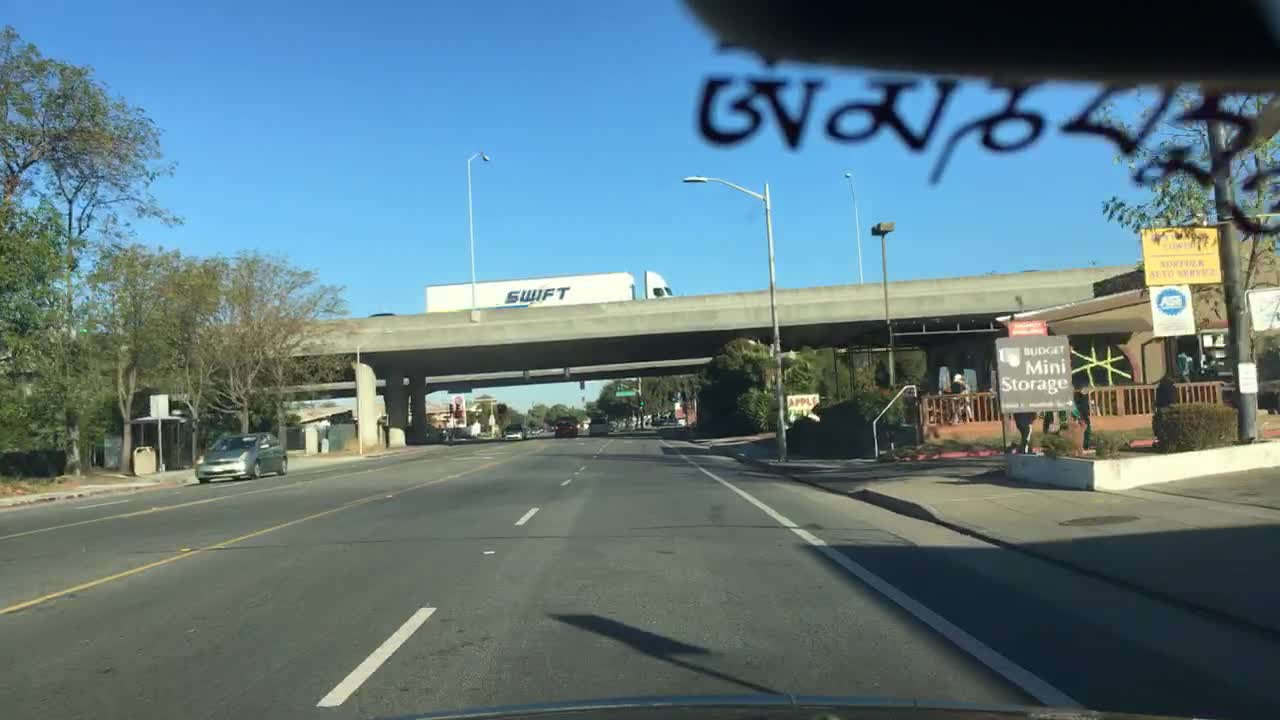

In [ ]:
image = cv2.imread("/content/bdd100k/images/100k/test/cac75967-8a9c164b.jpg")
display_image


from PIL import Image
import numpy as np
rgb = display_image[...,::-1].copy()
img = Image.fromarray(rgb, 'RGB')

img

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
display_image.shape

(720, 1280, 3)

500 486


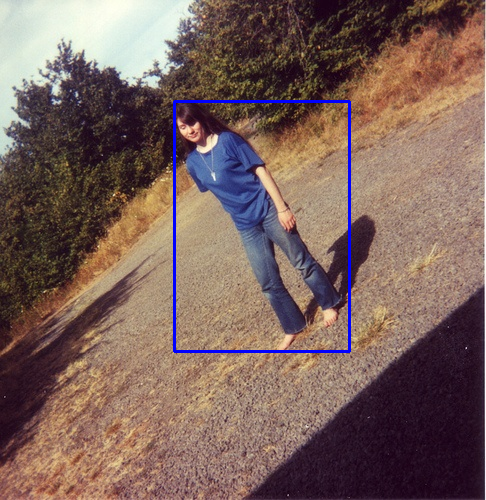

In [ ]:
image = cv2.imread("/content/VOCdevkit/VOC2012/JPEGImages/2007_000027.jpg")  # read image in bgr format
image = np.array(image, dtype=np.float)
image = np.uint8(image)

display_image = image.copy()
image_height, image_width, _ = image.shape
height_scale, width_scale = input_size/image_height, input_size/image_width
print(image_height, image_width)

xmin = max(int(pred[2] / width_scale), 1)
ymin = max(int(pred[3] / height_scale), 1)
xmax = min(int(pred[4] / width_scale), image_width-1)
ymax = min(int(pred[5] / height_scale), image_height-1)


cv2.rectangle(
    display_image,
    (174, 101),
    (349, 351),
    (255, 0, 0),
    2
)

cv2_imshow(display_image)